In [ ]:
%matplotlib inline

In [2]:
import pandas as pd 
from pandas.tools.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

<h2>Read in data</h2>

In [3]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

## Has data been read in ok?

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<b>Data has been read in OK. Data will need normalising as scales are different for each feature.</b>

## What range of quality label is there?

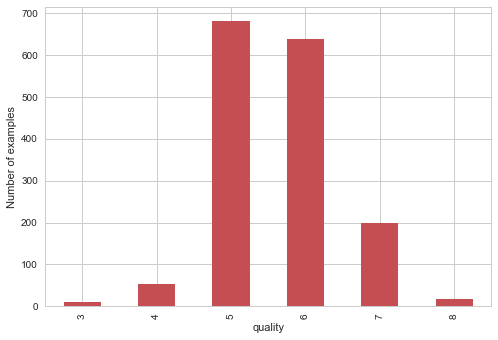

In [6]:
data.groupby('quality').size().plot.bar(color='r')
plt.ylabel("Number of examples")
plt.show()

<b>Much less data for quality values other than 5 and 6. Maybe a classification model would work best with 5, 6 and 7 as group boundaries?</b>

## Will a categorical quality label help?

In [16]:
# # Set a new field quality_label by transforming the existing quality column
# data['quality_label'] = data['quality'].apply(lambda value: 'low' if value <= 5 
#                                                               else 'medium' if value <= 7 
#                                                               else 'high')
# # Convert new field to categorical type
# data['quality_label'] = pd.Categorical(data['quality_label'], 
#                                        categories=['low', 'medium', 'high'])

# Simpler way to do it
bins = [1, 5, 6, 8]
data['quality_label'] = pd.cut(data.quality, bins, labels=['low', 'medium', 'high'], include_lowest=True)

In [25]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


<b>Categorical quality label has now been added to the original data set.</b>

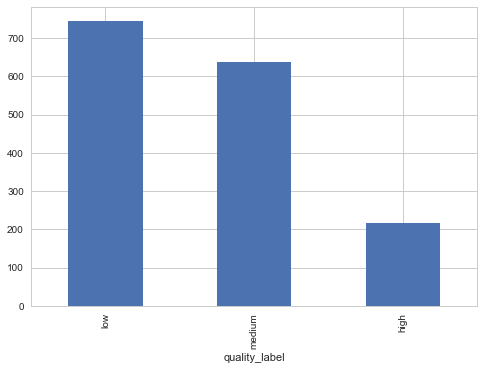

In [26]:
data.groupby('quality_label').size().plot.bar()
plt.show()

<h2>Are there any duplicates or nulls?</h2>

In [27]:
duplicate_count = str(np.sum(np.array(data.duplicated())))
print("Duplicate data count: " + duplicate_count)

Duplicate data count: 240


<b>There are a number of duplicates in the data. Let's remove them.</b>

In [30]:
data = data.drop_duplicates()
duplicate_count = str(np.sum(np.array(data.duplicated())))
print("Duplicate data count: " + duplicate_count)

Duplicate data count: 0


In [31]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
dtype: int64

<b>We have no null data which is good.</b>

<h2>What does basic statistical analysis show?</h2>

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


<b>This confirms that each features has different scales so normalisation may need to be used depending on the model.</b>

<b>Quality is clearly limited in range, between 3 and 8, and there are no observations with quality extremes.</b>

<b>There may also be some large outliers in the sulphur dioxide and residual sugar data points, given the difference between 75% quartile and max values.</b>

## Is there any outlier data?

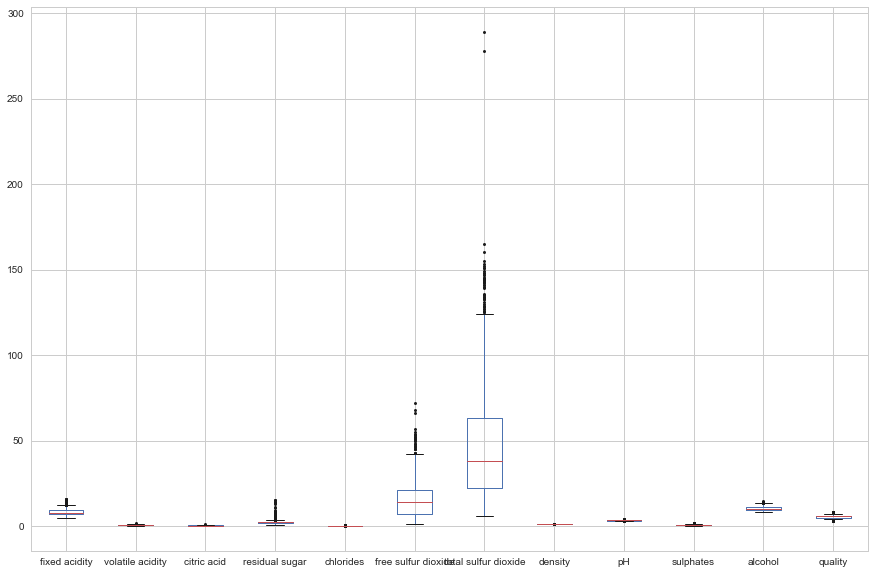

In [34]:
data.plot.box(sym='k.', figsize=(15,10))
plt.show()

<b>Easier to see here the features with outliers. Let's show each individually.</b>

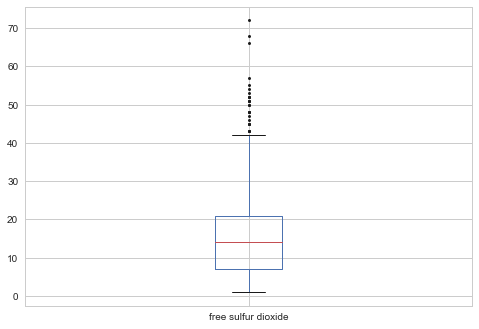

In [35]:
data[['free sulfur dioxide']].plot(kind='box', sym='k.')
plt.show()

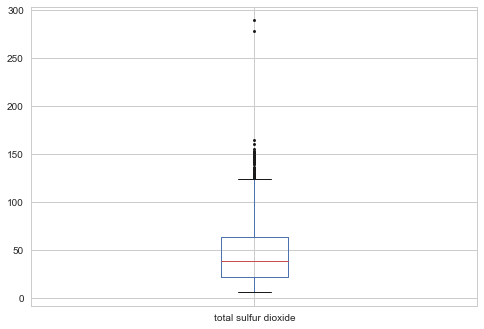

In [36]:
data[['total sulfur dioxide']].plot.box(sym='k.')
plt.show()

<b>A few severe outliers.</b>

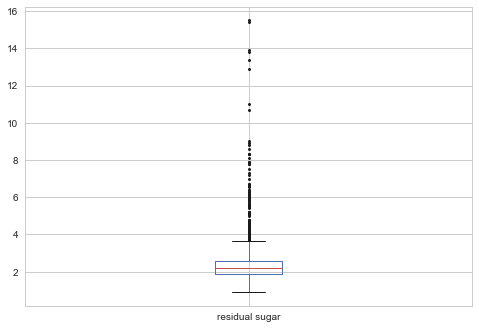

In [37]:
plot = data[['residual sugar']].plot.box(sym='k.')
plt.show()

<b>A few severe outliers.</b>

<b>Overall, suspicion of outliers for the residual sugar and sulfur dioxide seems correct.</b>

## Are there any features that correlate?

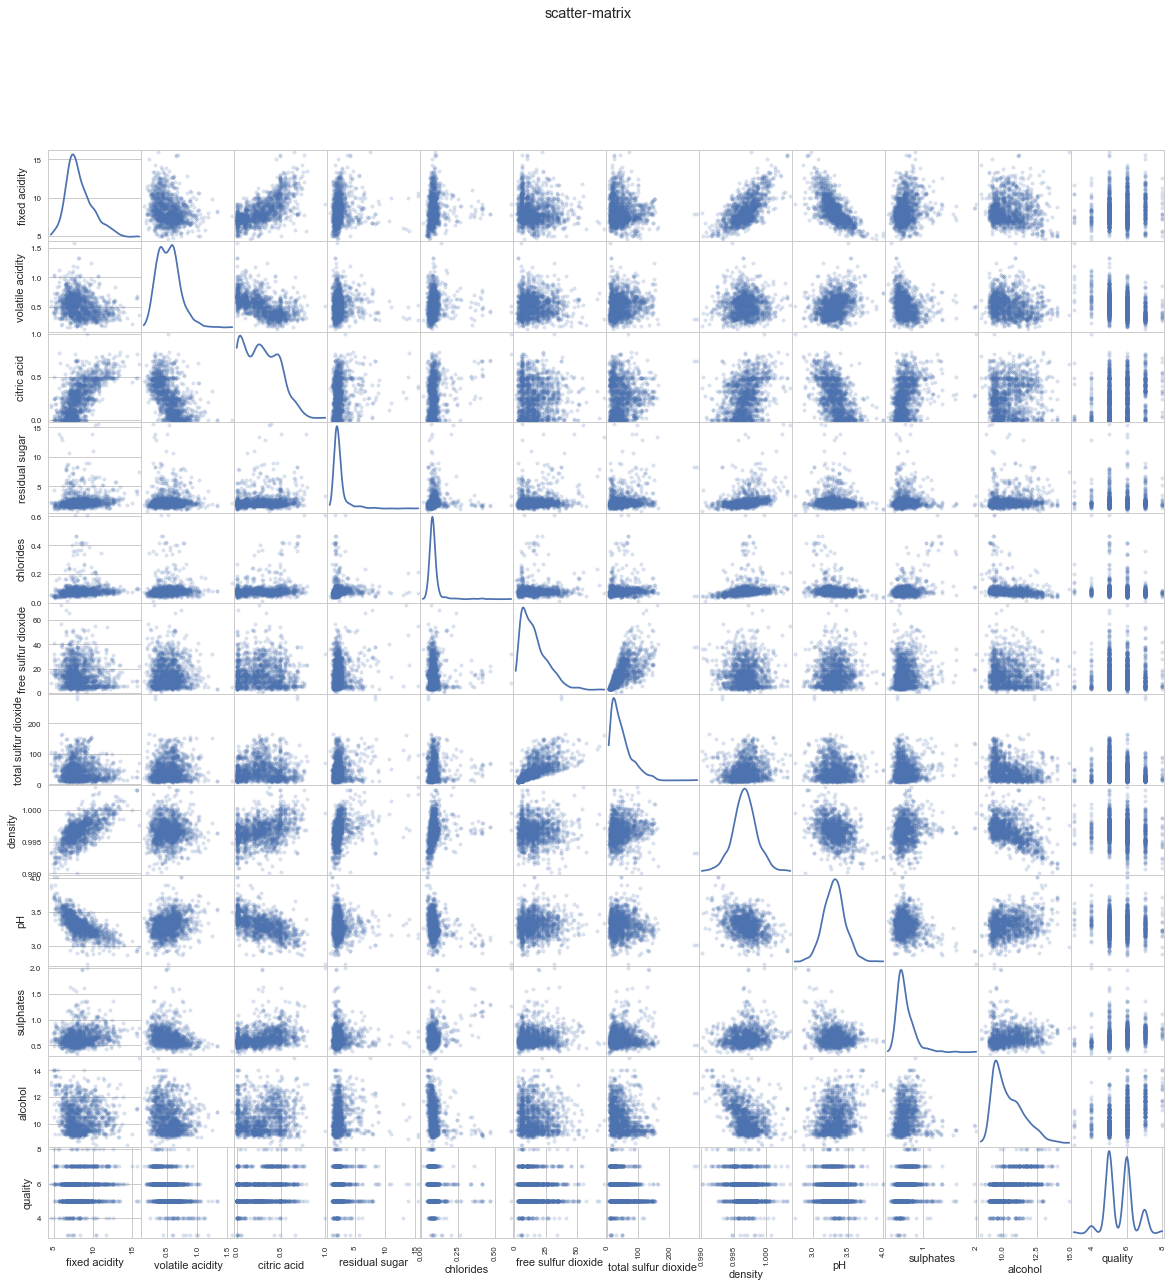

In [39]:
scatter_matrix(data, alpha=0.2, figsize=(20, 20), diagonal='kde')
plt.suptitle('scatter-matrix')
plt.show()

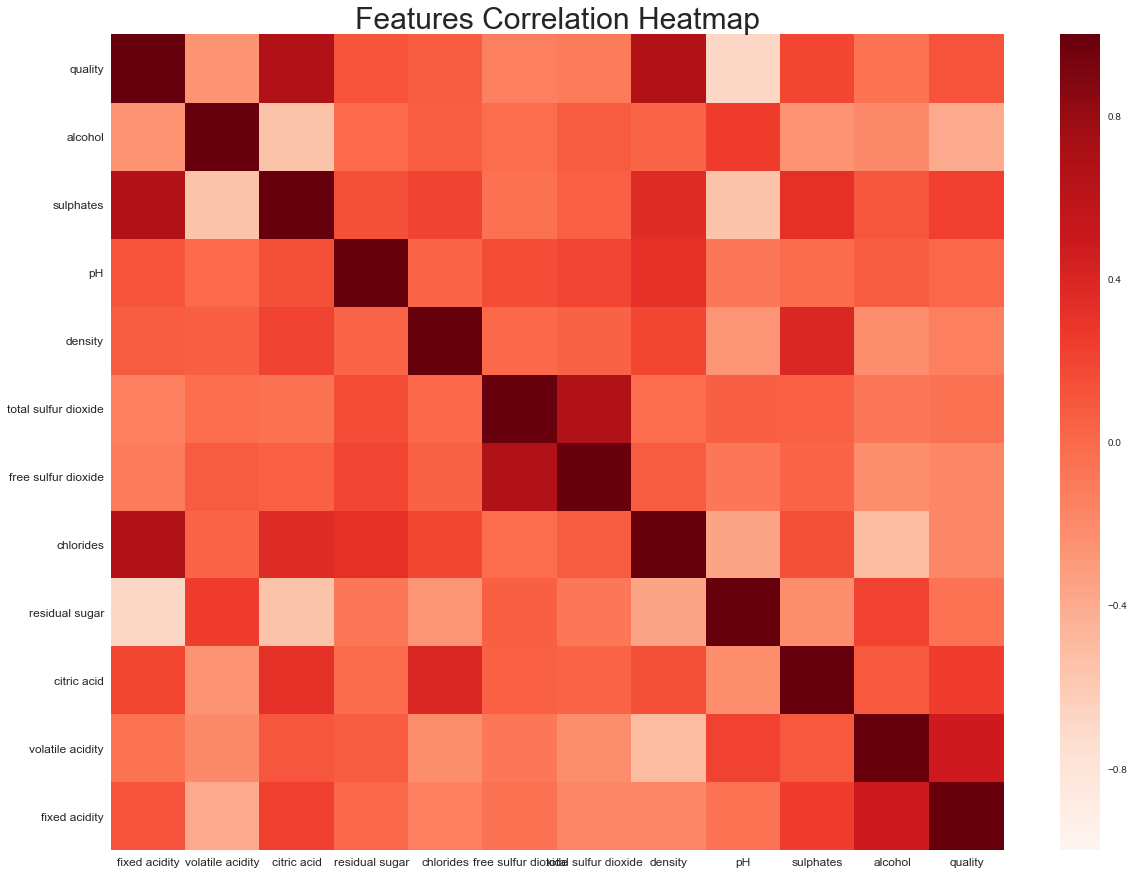

In [40]:
plt.subplots(figsize=(20,15))
corr = data.corr()
ax = sns.heatmap(corr, cmap="Reds")
ax.set_title("Features Correlation Heatmap", fontsize = 30)
ax.set_xticklabels(labels = corr.columns.values, fontsize = 12)
ax.set_yticklabels(labels = corr.columns.values, fontsize = 12)
plt.show()

In [41]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<b>Correlation between alcohol and quality, which is interesting.</b>

<h2>Let's confirm alcohol and quality correlation</h2>

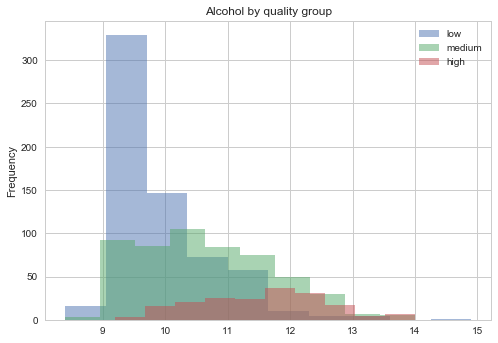

In [44]:
data.groupby('quality_label').alcohol.plot.hist(title='Alcohol by quality group', alpha=0.5, legend=True)
plt.show()

<b>Confirms trend of low quality having low amounts of alcohol.</b>